In [2]:
import pandas as pd
!pip install category_encoders

In [3]:
df = pd.read_csv('/Users/Projects/Competitions/Amex/dataset/train.csv')
test = pd.read_csv('/Users/Projects/Competitions/Amex/dataset/test.csv')

In [4]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
df.shape

(45528, 19)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'net_yearly_income'}>,
        <AxesSubplot:title={'center':'no_of_days_employed'}>],
       [<AxesSubplot:title={'center':'total_family_members'}>,
        <AxesSubplot:title={'center':'migrant_worker'}>,
        <AxesSubplot:title={'center':'yearly_debt_payments'}>,
        <AxesSubplot:title={'center':'credit_limit'}>],
       [<AxesSubplot:title={'center':'credit_limit_used(%)'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'prev_defaults'}>,
        <AxesSubplot:title={'center':'default_in_last_6months'}>],
       [<AxesSubplot:title={'center':'credit_card_default'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

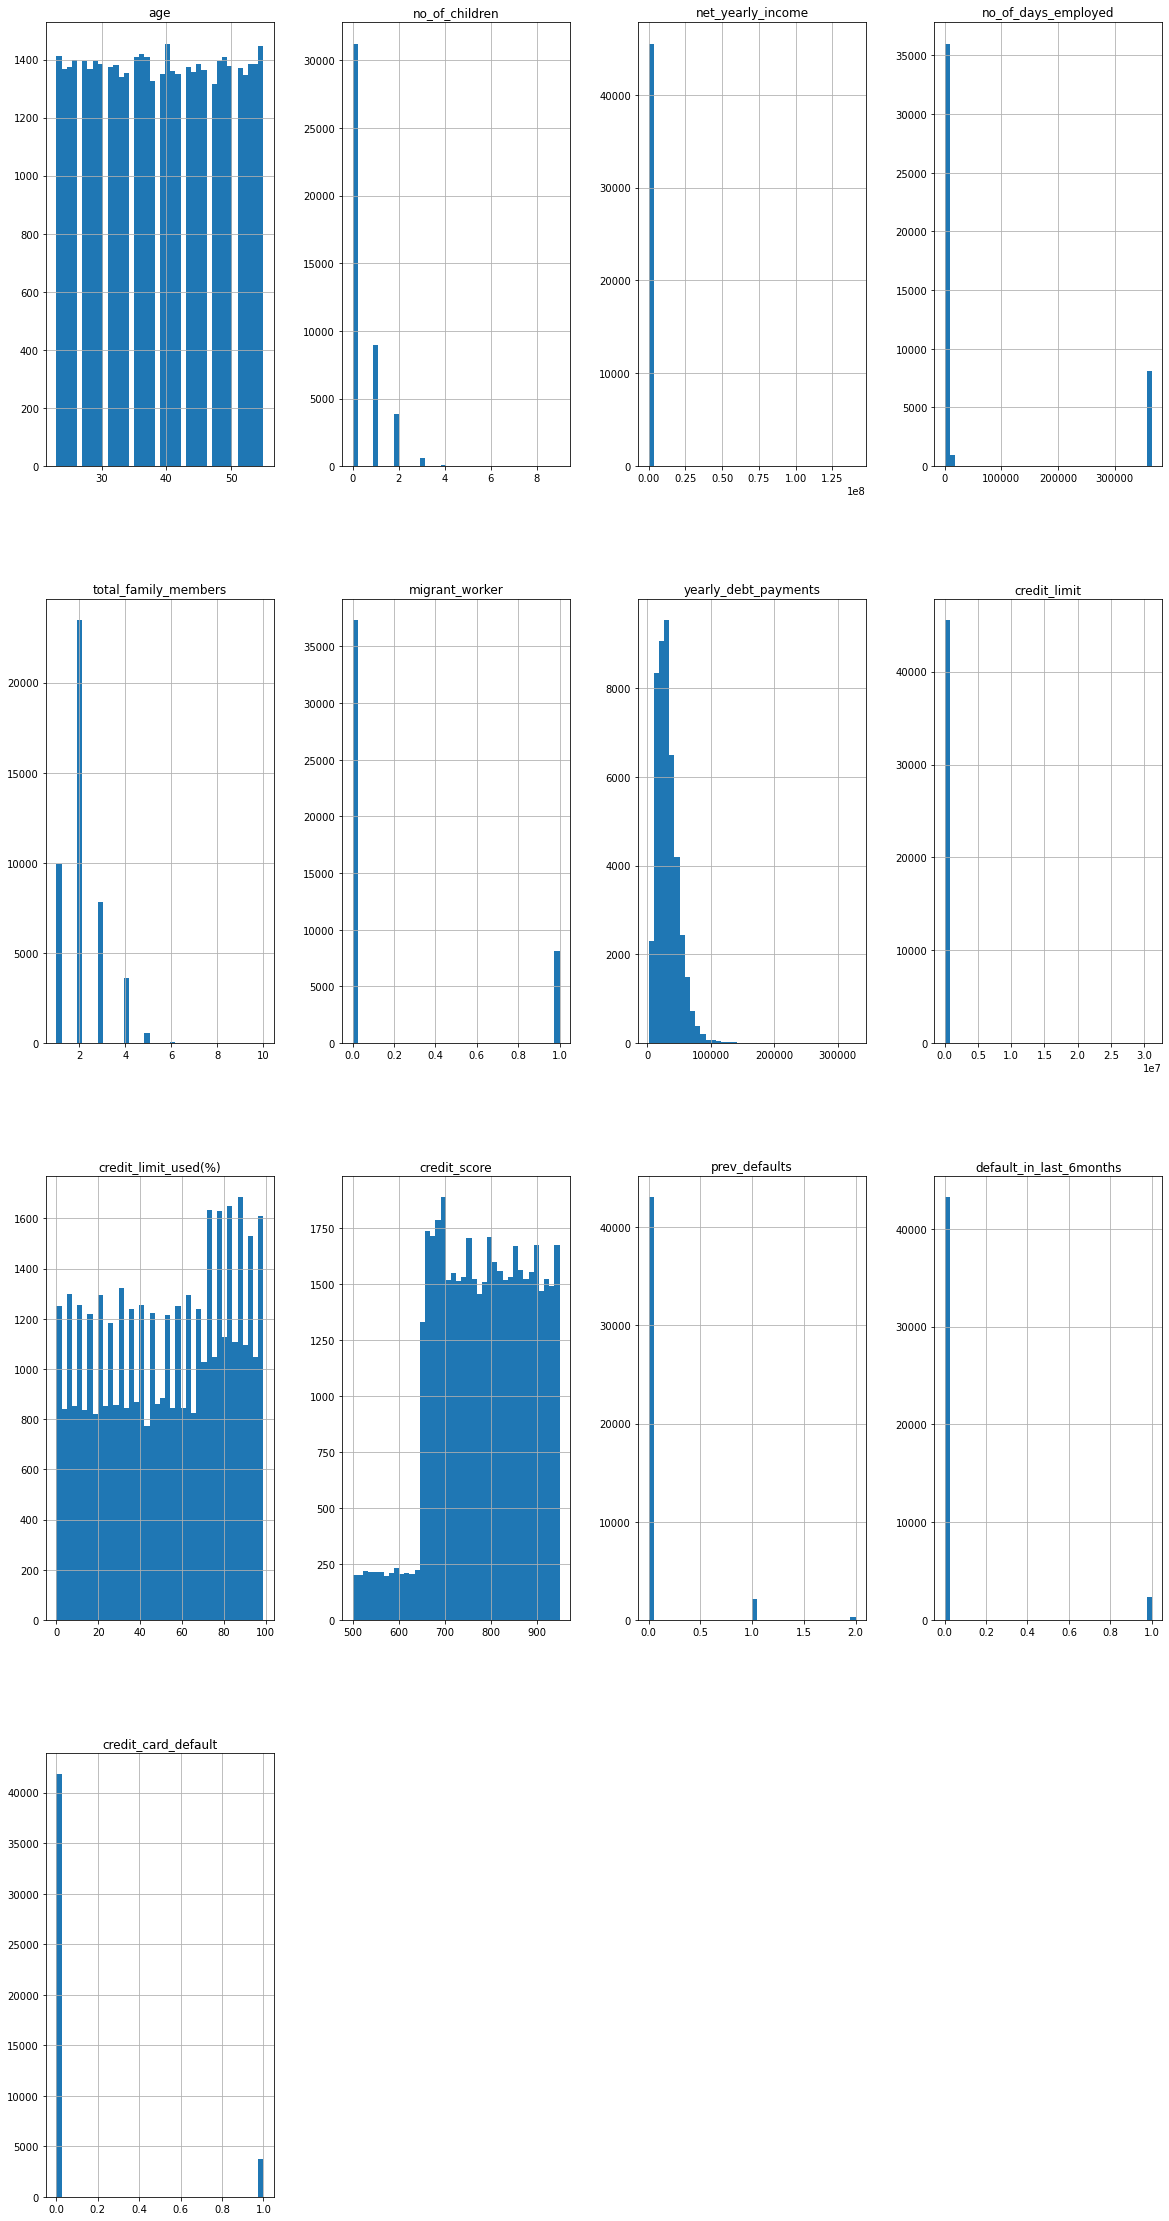

In [7]:
import  matplotlib.pyplot as plt
df.hist(bins=40, figsize=(20,40))

array([[<AxesSubplot:xlabel='yearly_debt_payments', ylabel='yearly_debt_payments'>,
        <AxesSubplot:xlabel='total_family_members', ylabel='yearly_debt_payments'>,
        <AxesSubplot:xlabel='net_yearly_income', ylabel='yearly_debt_payments'>,
        <AxesSubplot:xlabel='credit_card_default', ylabel='yearly_debt_payments'>],
       [<AxesSubplot:xlabel='yearly_debt_payments', ylabel='total_family_members'>,
        <AxesSubplot:xlabel='total_family_members', ylabel='total_family_members'>,
        <AxesSubplot:xlabel='net_yearly_income', ylabel='total_family_members'>,
        <AxesSubplot:xlabel='credit_card_default', ylabel='total_family_members'>],
       [<AxesSubplot:xlabel='yearly_debt_payments', ylabel='net_yearly_income'>,
        <AxesSubplot:xlabel='total_family_members', ylabel='net_yearly_income'>,
        <AxesSubplot:xlabel='net_yearly_income', ylabel='net_yearly_income'>,
        <AxesSubplot:xlabel='credit_card_default', ylabel='net_yearly_income'>],
       [<Axes

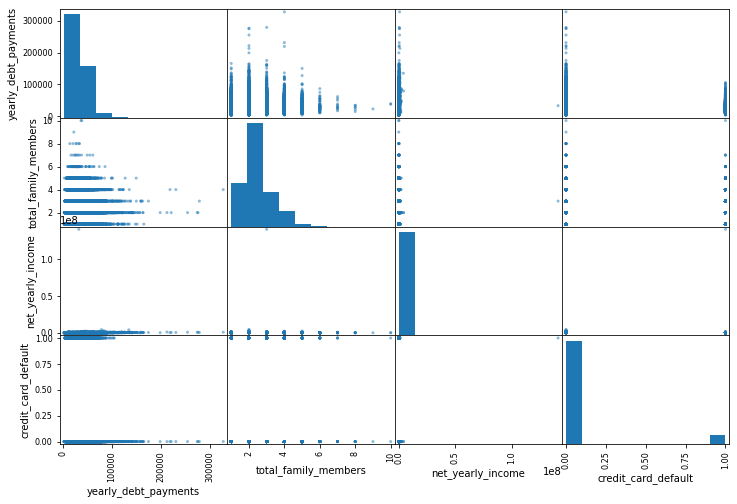

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["yearly_debt_payments", "total_family_members", "net_yearly_income", "credit_card_default"]
scatter_matrix(df[attributes], figsize=(12,8))

In [10]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [6]:
df = df.drop(['name'], axis=1)
test = test.drop(['name'], axis=1)

In [7]:
df.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [8]:
for i in range(len(df.gender)):
    if df.gender[i] == 'F':
        df.gender[i] = 1
    else:
        df.gender[i] = 0

for i in range(len(test.gender)):
    if test.gender[i] == 'F':
        test.gender[i] = 1
    else:
        test.gender[i] = 0

<ipython-input-8-6ee433164a9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[i] = 1
<ipython-input-8-6ee433164a9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[i] = 0
<ipython-input-8-6ee433164a9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.gender[i] = 1
<ipython-input-8-6ee433164a9d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [9]:
df.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,1,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,0,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,0,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,1,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,0,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [10]:
#Owns Car NULL Values replaced with 0
for i in range(len(df.owns_car)):
    if df.owns_car[i] == 'Y':
        df.owns_car[i] = 0
    elif df.owns_car[i] == 'N':
        df.owns_car[i] = 1

for i in range(len(df.owns_house)):
    if df.owns_house[i] == 'Y':
        df.owns_house[i] = 1
    else:
        df.owns_house[i] = 0

for i in range(len(test.owns_car)):
    if test.owns_car[i] == 'Y':
        test.owns_car[i] = 0
    elif test.owns_car[i] == 'N':
        test.owns_car[i] = 1

for i in range(len(test.owns_house)):
    if test.owns_house[i] == 'Y':
        test.owns_house[i] = 1
    else:
        test.owns_house[i] = 0

<ipython-input-10-d2807cc9fa81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.owns_car[i] = 1
<ipython-input-10-d2807cc9fa81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.owns_car[i] = 0
<ipython-input-10-d2807cc9fa81>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.owns_house[i] = 1
<ipython-input-10-d2807cc9fa81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [11]:
df.head(10)

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,1,1,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,0,1,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,0,1,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,1,1,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,0,0,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,46,1,0,0,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,38,0,1,1,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,46,1,0,1,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,40,1,NaN,1,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,39,1,0,1,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [12]:
df.occupation_type.unique()

array(['Unknown', 'Laborers', 'Core staff', 'Accountants',
       'High skill tech staff', 'Sales staff', 'Managers', 'Drivers',
       'Medicine staff', 'Cleaning staff', 'HR staff', 'Security staff',
       'Cooking staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Private service staff', 'Secretaries', 'Realty agents',
       'IT staff'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
df['occupation_type'] = LabelEncoder().fit_transform(df.occupation_type)
test['occupation_type'] = LabelEncoder().fit_transform(test.occupation_type)

In [14]:
df

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,1,1,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,0,1,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,0,1,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,1,1,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,0,0,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,55,1,1,0,2.0,96207.57,117.0,17,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,31,1,1,1,0.0,383476.74,966.0,0,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,27,1,1,1,0.0,260052.18,1420.0,3,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,32,0,0,0,0.0,157363.04,2457.0,8,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


<AxesSubplot:>

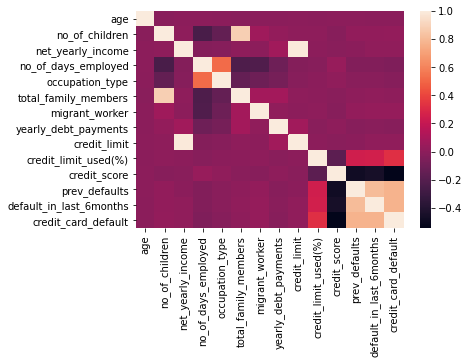

In [15]:
import seaborn as sns
sns.heatmap(df.corr())

In [16]:
df.corr()

,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
age,1.000000,-0.009082,0.004079,0.000506,-0.002765,-0.010640,-0.005519,-0.002453,0.004473,-0.005529,0.000817,0.001393,-0.001406,-0.000983
no_of_children,-0.009082,1.000000,0.008939,-0.243088,-0.146223,0.880278,0.070673,0.028706,0.009354,0.007487,-0.014673,0.019528,0.021620,0.023689
net_yearly_income,0.004079,0.008939,1.000000,-0.029367,-0.018771,0.010432,0.001478,0.076958,0.993378,0.002696,-0.009688,-0.004696,0.015092,0.011508
no_of_days_employed,0.000506,-0.243088,-0.029367,1.000000,0.522463,-0.229344,-0.219521,-0.104545,-0.027745,-0.018720,0.035533,-0.036232,-0.034295,-0.047043
occupation_type,-0.002765,-0.146223,-0.018771,0.522463,1.000000,-0.144453,-0.111314,-0.074425,-0.018436,-0.005262,0.016739,-0.012277,-0.011574,-0.021439
total_family_members,-0.010640,0.880278,0.010432,-0.229344,-0.144453,1.000000,0.080634,0.078669,0.010251,0.001928,-0.011524,0.010608,0.013411,0.010754
migrant_worker,-0.005519,0.070673,0.001478,-0.219521,-0.111314,0.080634,1.000000,0.014170,-0.000110,0.010198,-0.013319,0.029202,0.029964,0.034013
yearly_debt_payments,-0.002453,0.028706,0.076958,-0.104545,-0.074425,0.078669,0.014170,1.000000,0.075169,-0.006850,0.005756,-0.012738,-0.011619,-0.013089
credit_limit,0.004473,0.009354,0.993378,-0.027745,-0.018436,0.010251,-0.000110,0.075169,1.000000,0.003109,-0.009685,-0.004302,0.015759,0.012250
credit_limit_used(%),-0.005529,0.007487,0.002696,-0.018720,-0.005262,0.001928,0.010198,-0.006850,0.003109,1.000000,-0.174420,0.252505,0.253684,0.326641


<function matplotlib.pyplot.show(close=None, block=None)>

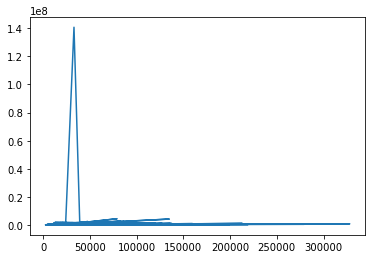

In [17]:
import matplotlib.pyplot as plt
plt.plot(df.yearly_debt_payments, df.net_yearly_income)
plt.show

In [18]:
df = df.drop('prev_defaults', axis=1)
test = test.drop('prev_defaults', axis=1)

In [19]:
# df = df.drop('no_of_children', axis=1)
# test = test.drop('no_of_children', axis=1)

In [20]:
for i in range(len(df.no_of_children)):
    if df.no_of_children.isnull()[i]:
        if df.total_family_members[i] > 2:
            df.no_of_children[i] = df.total_family_members[i] - 2
        else:
            df.no_of_children[i] = 0

for i in range(len(test.no_of_children)):
    if test.no_of_children.isnull()[i]:
        if test.total_family_members[i] > 2:
            test.no_of_children[i] = test.total_family_members[i] - 2
        else:
            test.no_of_children[i] = 0

<ipython-input-20-8a2e86b73ff4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.no_of_children[i] = 0
<ipython-input-20-8a2e86b73ff4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.no_of_children[i] = df.total_family_members[i] - 2
<ipython-input-20-8a2e86b73ff4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.no_of_children[i] = 0
<ipython-input-20-8a2e86b73ff4>:11: SettingWithCopyWarning: 
A value is trying to be set 

In [21]:
for i in range(len(df.owns_car)):
    if df.owns_car.isnull()[i]:
        if df.net_yearly_income[i] >= 220000:
            df.owns_car[i] = 1
        else:
            df.owns_car[i] = 0

for i in range(len(test.owns_car)):
    if test.owns_car.isnull()[i]:
        if test.net_yearly_income[i] >= 220000:
            test.owns_car[i] = 1
        else:
            test.owns_car[i] = 0

<ipython-input-21-63c92a97945c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.owns_car[i] = 0
<ipython-input-21-63c92a97945c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.owns_car[i] = 1
<ipython-input-21-63c92a97945c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.owns_car[i] = 0
<ipython-input-21-63c92a97945c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [22]:
df.owns_car.isnull()[0]

False

In [23]:
df.head(10)

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
0,CST_115179,46,1,1,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,18690.93,73,544.0,1,1
1,CST_121920,29,0,1,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0
2,CST_109330,37,0,1,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0
3,CST_128288,39,1,1,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0
4,CST_151355,46,0,0,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0
5,CST_123268,46,1,0,0,0.0,252765.91,2898.0,0,2.0,1.0,37046.86,40245.64,19,937.0,0,0
6,CST_127502,38,0,1,1,1.0,262389.20,5541.0,6,3.0,0.0,50839.39,41311.08,42,733.0,0,0
7,CST_151722,46,1,0,1,1.0,241211.39,1448.0,3,3.0,0.0,30008.46,32209.22,91,906.0,0,0
8,CST_133768,40,1,0,1,0.0,210091.43,11551.0,8,2.0,0.0,21521.89,65037.74,14,783.0,0,0
9,CST_111670,39,1,0,1,2.0,207109.13,2791.0,6,4.0,0.0,9509.10,28425.52,14,666.0,0,0


In [24]:
df = df.drop('credit_limit', axis=1)
test = test.drop('credit_limit', axis=1)

<AxesSubplot:>

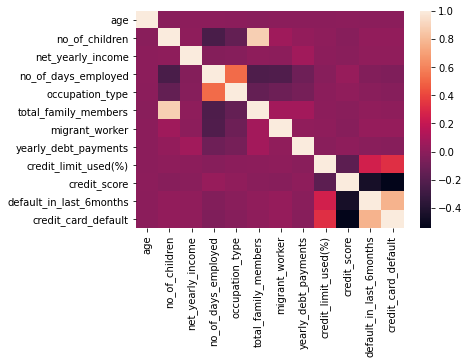

In [25]:
sns.heatmap(df.corr())

In [26]:
df.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
0,CST_115179,46,1,1,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,73,544.0,1,1
1,CST_121920,29,0,1,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,52,857.0,0,0
2,CST_109330,37,0,1,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,43,650.0,0,0
3,CST_128288,39,1,1,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,20,754.0,0,0
4,CST_151355,46,0,0,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,75,927.0,0,0


In [27]:
df.age = df.age/100
test.age = test.age/100
df.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
0,CST_115179,0.46,1,1,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,73,544.0,1,1
1,CST_121920,0.29,0,1,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,52,857.0,0,0
2,CST_109330,0.37,0,1,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,43,650.0,0,0
3,CST_128288,0.39,1,1,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,20,754.0,0,0
4,CST_151355,0.46,0,0,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,75,927.0,0,0


In [28]:
customer_id = test.customer_id
df = df.drop('customer_id', axis=1)
test = test.drop('customer_id', axis=1)

In [29]:
df.net_yearly_income = (df.net_yearly_income - max(df.net_yearly_income))/(max(df.net_yearly_income) - min(df.net_yearly_income))

test.net_yearly_income = (test.net_yearly_income - max(test.net_yearly_income))/(max(test.net_yearly_income) - min(test.net_yearly_income))

In [30]:
df.credit_score = df.credit_score/1000
test.credit_score = test.credit_score/1000

In [31]:
df['credit_limit_used(%)'] = df['credit_limit_used(%)']/100
test['credit_limit_used(%)'] = test['credit_limit_used(%)']/100

In [32]:
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
0,0.46,1,1,1,0.0,-0.999426,612.0,17,1.0,1.0,33070.28,0.73,0.544,1,1
1,0.29,0,1,1,0.0,-0.999412,2771.0,8,2.0,0.0,15329.53,0.52,0.857,0,0
2,0.37,0,1,1,0.0,-0.998558,204.0,8,2.0,0.0,48416.60,0.43,0.650,0,0
3,0.39,1,1,1,0.0,-0.999324,11941.0,3,2.0,0.0,22574.36,0.20,0.754,0,0
4,0.46,0,0,1,0.0,-0.997441,1459.0,3,1.0,0.0,38282.95,0.75,0.927,0,0


In [33]:
df['no_of_days_employed'] = (df['no_of_days_employed'] - min(df['no_of_days_employed']))/(max(df['no_of_days_employed']) - min(df['no_of_days_employed']))

test['no_of_days_employed'] = (test['no_of_days_employed'] - min(test['no_of_days_employed']))/(max(test['no_of_days_employed']) - min(test['no_of_days_employed']))

In [34]:
df['yearly_debt_payments'] = (df['yearly_debt_payments'] - min(df['yearly_debt_payments']))/(max(df['yearly_debt_payments']) - min(df['yearly_debt_payments']))

test['yearly_debt_payments'] = (test['yearly_debt_payments'] - min(test['yearly_debt_payments']))/(max(test['yearly_debt_payments']) - min(test['yearly_debt_payments']))

In [35]:
df.head(10)

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
0,0.46,1,1,1,0.0,-0.999426,0.001670,17,1.0,1.0,0.094615,0.73,0.544,1,1
1,0.29,0,1,1,0.0,-0.999412,0.007581,8,2.0,0.0,0.040175,0.52,0.857,0,0
2,0.37,0,1,1,0.0,-0.998558,0.000553,8,2.0,0.0,0.141708,0.43,0.650,0,0
3,0.39,1,1,1,0.0,-0.999324,0.032687,3,2.0,0.0,0.062407,0.20,0.754,0,0
4,0.46,0,0,1,0.0,-0.997441,0.003989,3,1.0,0.0,0.110611,0.75,0.927,0,0
5,0.46,1,0,0,0.0,-0.998397,0.007929,0,2.0,1.0,0.106818,0.19,0.937,0,0
6,0.38,0,1,1,1.0,-0.998329,0.015165,6,3.0,0.0,0.149143,0.42,0.733,0,0
7,0.46,1,0,1,1.0,-0.998479,0.003959,3,3.0,0.0,0.085220,0.91,0.906,0,0
8,0.40,1,0,1,0.0,-0.998700,0.031619,8,2.0,0.0,0.059177,0.14,0.783,0,0
9,0.39,1,0,1,2.0,-0.998721,0.007636,6,4.0,0.0,0.022314,0.14,0.666,0,0


<AxesSubplot:>

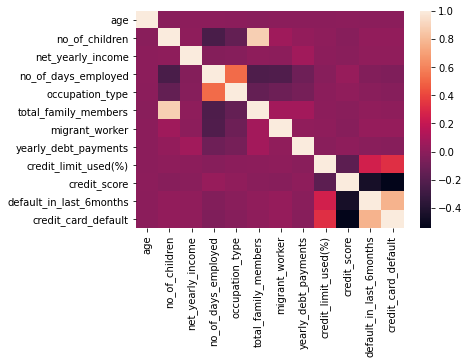

In [36]:
sns.heatmap(df.corr())

In [37]:
df.isnull().sum()

age                          0
gender                       0
owns_car                     0
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit_used(%)         0
credit_score                 8
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [38]:
df.dtypes

age                        float64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type              int64
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit_used(%)       float64
credit_score               float64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [39]:
for i in df.columns:
    df[i].fillna(df[i].median(), inplace=True)

for j in test.columns:
    test[j].fillna(test[j].median(), inplace=True)

In [40]:
#independent and dependent features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [107]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [108]:
y_predicted = model.predict(X_test)

In [109]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted, average='macro')

0.9322848479251782

In [104]:
f1_score(y_test, y_pred, average='macro')

0.876299807462765

In [91]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_predsvc = clf.predict(X_test)

In [92]:
f1_score(y_test, y_predsvc, average='macro')

0.8764422260260548

In [93]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_predknn = neigh.predict(X_test)

In [94]:
f1_score(y_test, y_predknn, average='macro')

0.8207823028165604

In [110]:
y_submit = model.predict(test)
output = pd.DataFrame({'customer_id': customer_id, 'credit_card_default': y_submit})
output.to_csv('my_submission2.csv', index=False)

In [96]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.1,hidden_layer_sizes=(5, 2), random_state=1, max_iter=1500, learning_rate='adaptive')
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(5, 2), learning_rate='adaptive',
              max_iter=1500, random_state=1, solver='lbfgs')

In [97]:
nnpred = clf.predict(X_test)

In [98]:
f1_score(y_test, nnpred, average='macro')

0.924210185312689

In [55]:
f1_score(y_test, y_predknn, average='macro')
y_submit = clf.predict(test)
output = pd.DataFrame({'customer_id': customer_id, 'credit_card_default': y_submit})
output.shape
output.to_csv('my_submission2.csv', index=False)

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, Y)
xgbpred = xgb.predict(X_test)
f1_score(y_test, xgbpred, average='macro')

/Users/abhinavaravindan/Softwares/Anaconda/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9902095496134782

In [64]:
y_submit = xgb.predict(test)
output = pd.DataFrame({'customer_id': customer_id, 'credit_card_default': y_submit})
output.to_csv('my_submission2.csv', index=False)